In [17]:
#Importing the libraries
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [18]:
#Importing the dataset
data= pd.read_csv("Social_Network_Ads.csv")

In [19]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [20]:
features= data.iloc[:, [2,3]].values

In [21]:
labels= data.iloc[:,4].values

In [22]:
#Splitting the dataset into the test set and training set
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test= train_test_split(features, labels, test_size= 0.25, random_state=0)

In [36]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
features_train= sc.fit_transform(features_train)
features_test= sc.transform(features_test)

In [37]:
#Fitting Logistic Regression to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(features_train, labels_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
#Predicting the test set results
labels_pred= classifier.predict(features_test)

In [39]:
#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(labels_test, labels_pred)

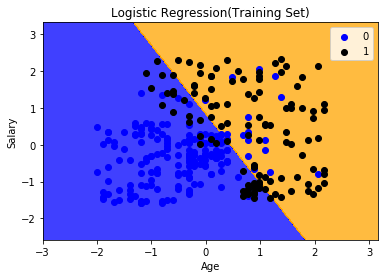

In [44]:
#Visualising the training set results
from matplotlib.colors import ListedColormap
features_set, labels_set= features_train, labels_train
features1, features2= np.meshgrid(np.arange(start= features_set[:,0].min() -1, stop = features_set[:,0].max() +1, step =0.01 ),
                               np.arange(start= features_set[:,1].min() -1, stop = features_set[:,1].max() +1, step =0.01 ))
plt.contourf(features1, features2, classifier.predict(np.array([features1.ravel(), features2.ravel()]).T).reshape(features1.shape),
            alpha = 0.75, cmap = ListedColormap(("blue", "orange")))
plt.xlim(features1.min(), features1.max())
plt.ylim(features2.min(), features2.max())
for i, j in enumerate(np.unique(labels_set)):
    plt.scatter(features_set[labels_set== j, 0], features_set[labels_set ==j, 1], 
               c= ListedColormap(("blue", "black")) (i), label= j)
    
    plt.title("Logistic Regression(Training Set)")
    plt.xlabel("Age")
    plt.ylabel("Salary")
    plt.legend()

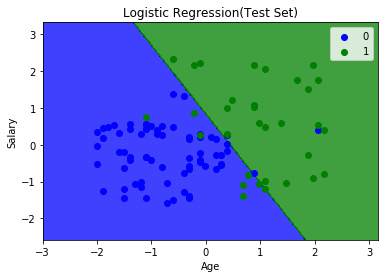

In [45]:
#Visualising the Test Set Results
from matplotlib.colors import ListedColormap
features_set, labels_set= features_test, labels_test
features1, features2= np.meshgrid(np.arange(start= features_set[:,0].min() -1, stop = features_set[:,0].max() +1, step =0.01 ),
                               np.arange(start= features_set[:,1].min() -1, stop = features_set[:,1].max() +1, step =0.01 ))
plt.contourf(features1, features2, classifier.predict(np.array([features1.ravel(), features2.ravel()]).T).reshape(features1.shape),
            alpha = 0.75, cmap = ListedColormap(("blue", "green")))
plt.xlim(features1.min(), features1.max())
plt.ylim(features2.min(), features2.max())
for i, j in enumerate(np.unique(labels_set)):
    plt.scatter(features_set[labels_set== j, 0], features_set[labels_set ==j, 1], 
               c= ListedColormap(("blue", "green")) (i), label= j)
    
    plt.title("Logistic Regression(Test Set)")
    plt.xlabel("Age")
    plt.ylabel("Salary")
    plt.legend()

In [43]:
#Accuracy of the Model
classifier.score(features, labels)

0.3575